## Tourism and Gentrification: The Case of San Juan, Puerto Rico (Part 1)

In this project, I explore the interactions between the processes of gentrification and tourism in San Juan, Puerto Rico, with an emphasis on Santurce. I will use three datasets: two from the American Community Census (ACS) 5-year 2019 estimates and one from geodata collected by the government of Puerto Rico. From the ACS, I use the race variable and the mean household income for block groups in San Juan.  

_Note: I have created two Jupyter notebooks, as having only one made it very slow on Github. I explore gentrification indicators on this one (part 1), and tourism indicators in the other one (part 2)._

### Gentrification Indicators

#### Mean Income

Importing my data, pandas,geopandas, contextily for basemaps, and matplotlib and plotly for graphics.

In [34]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

In [35]:
#importing data
income=gpd.read_file('acs2019_san juan_household_income.geojson')

Now, I will conduct some data exploration/cleaning.

In [3]:
income.shape

(365, 37)

In [4]:
income.head()

geoid                         name  B19001001  \
0  15000US721270004001  Block Group 1, San Juan, PR      384.0   
1  15000US721270004002  Block Group 2, San Juan, PR      311.0   
2  15000US721270005061  Block Group 1, San Juan, PR      362.0   
3  15000US721270005062  Block Group 2, San Juan, PR      481.0   
4  15000US721270006001  Block Group 1, San Juan, PR      265.0   

   B19001001, Error  B19001002  B19001002, Error  B19001003  B19001003, Error  \
0              83.0      191.0              67.0       54.0              45.0   
1              71.0       69.0              32.0       44.0              36.0   
2              86.0       66.0              38.0       11.0              15.0   
3             104.0       45.0              40.0       69.0              55.0   
4              64.0      152.0              61.0       44.0              36.0   

   B19001004  B19001004, Error  ...  B19001013, Error  B19001014  \
0       36.0              34.0  ...              14.0        0.0   
1       14.0              15.0  ...              11.0        7.0   
2       54.0              36.0  ...              18.0        0.0   
3       31.0              35.0  ...              31.0       55.0   
4       10.0              17.0  ...              14.0        0.0   

   B19001014, Error  B19001015  B19001015, Error  B19001016  B19001016, Error  \
0              14.0        0.0              14.0        0.0              14.0   
1              11.0       26.0              30.0       18.0              22.0   
2              14.0        0.0              14.0       10.0              15.0   
3              42.0        0.0              14.0       13.0              14.0   
4              14.0        0.0              14.0        0.0              14.0   

   B19001017  B19001017, Error  \
0        0.0              14.0   
1       14.0              22.0   
2       21.0              23.0   
3       39.0              28.0   
4        0.0              14.0   

                                            geometry  
0  MULTIPOLYGON (((-66.11862 18.46914, -66.11834 ...  
1  MULTIPOLYGON (((-66.11601 18.46817, -66.11569 ...  
2  MULTIPOLYGON (((-66.11925 18.46353, -66.11908 ...  
3  MULTIPOLYGON (((-66.12455 18.46155, -66.12021 ...  
4  MULTIPOLYGON (((-66.10417 18.46589, -66.10386 ...  

[5 rows x 37 columns]

In [36]:
#dropping the 0 column
income = income.drop([0])

In [37]:
#Now I will drop the columns that are marked as error
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [38]:
# redefine variable with only columns to keep
income = income[columns_to_keep]

In [39]:
#renaming columns with their names (taken from the dictionary that came with the data)
income.columns = ['geoid',
 'name',
'Total',
'Less than $10,000',
'$10,000 to $14,999',
'$15,000 to $19,999',
'$20,000 to $24,999',
'$25,000 to $29,999',
'$30,000 to $34,999',
'$35,000 to $39,999',
'$40,000 to $44,999',
'$45,000 to $49,999',
'$50,000 to $59,999',
'$60,000 to $74,999',
'$75,000 to $99,999',
'$100,000 to $124,999',
'$125,000 to $149,999',
'$150,000 to $199,999',
'$200,000 or more',
 'geometry']

In [40]:
income_sorted = income.sort_values(by='Total',ascending = False)

In [41]:
income_sorted[['geoid','Total']].head(10)

geoid     Total
364       16000US7276770  138385.0
199  15000US721270068001    2334.0
345  15000US721270100421    1100.0
316  15000US721270098005    1062.0
340  15000US721270100222    1023.0
334  15000US721270100022    1001.0
331  15000US721270100013     998.0
281  15000US721270091112     930.0
234  15000US721270080011     925.0
239  15000US721270080023     909.0

In [42]:
#Here, I am dropping that 364 row since it contains all of my data and it will skew my charts.
income = income.drop([364])

In [43]:
# reproject to Web Mercator
income_web_mercator = income.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


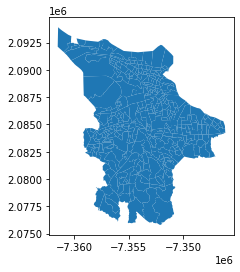

In [44]:
income_web_mercator.plot()
# add a basemap
ctx.add_basemap(ax)

In [45]:
#I am going to create some new columns that go with guidelines for poverty and normalize them (create percentages
income['Percent Households with Less than $19,999']=income['Less than $10,000']+ income['$15,000 to $19,999']/income['Total']*100
income['Households with Less than $19,999']=income['Less than $10,000']+ income['$15,000 to $19,999']
income['Percent Households with $20,000 to $49,999']=income['$20,000 to $24,999']+ income['$25,000 to $29,999']+ income['$30,000 to $34,999']+ income['$35,000 to $39,999']+ income['$40,000 to $44,999']+ income['$45,000 to $49,999']/income['Total']*100
income['Households with $20,000 to $49,999']=income['$20,000 to $24,999']+ income['$25,000 to $29,999']+ income['$30,000 to $34,999']+ income['$35,000 to $39,999']+ income['$40,000 to $44,999']+ income['$45,000 to $49,999']
income['Percent Households with $50,000 to $149,999']=income['$50,000 to $59,999']+income['$60,000 to $74,999']+income['$75,000 to $99,999']+income['$100,000 to $124,999']+ income['$125,000 to $149,999']/income['Total']*100
income['Households with $50,000 to $149,999']=income['$50,000 to $59,999']+income['$60,000 to $74,999']+income['$75,000 to $99,999']+income['$100,000 to $124,999']+ income['$125,000 to $149,999']
income['Percent Households with More than $125,000']= income['$125,000 to $149,999']+income['$150,000 to $199,999']+income['$200,000 or more']/income['Total']*100
income['Households with More than $125,000']= income['$125,000 to $149,999']+income['$150,000 to $199,999']+income['$200,000 or more']

In [46]:
income.head()

geoid                         name  Total  Less than $10,000  \
1  15000US721270004002  Block Group 2, San Juan, PR  311.0               69.0   
2  15000US721270005061  Block Group 1, San Juan, PR  362.0               66.0   
3  15000US721270005062  Block Group 2, San Juan, PR  481.0               45.0   
4  15000US721270006001  Block Group 1, San Juan, PR  265.0              152.0   
5  15000US721270006002  Block Group 2, San Juan, PR  262.0               37.0   

   $10,000 to $14,999  $15,000 to $19,999  $20,000 to $24,999  \
1                44.0                14.0                 6.0   
2                11.0                54.0                22.0   
3                69.0                31.0                30.0   
4                44.0                10.0                18.0   
5                 6.0                17.0                 0.0   

   $25,000 to $29,999  $30,000 to $34,999  $35,000 to $39,999  ...  \
1                 0.0                21.0                12.0  ...   
2                52.0                 0.0                 0.0  ...   
3                 0.0                29.0                29.0  ...   
4                 6.0                 0.0                 6.0  ...   
5                 0.0                 0.0                 6.0  ...   

   $200,000 or more                                           geometry  \
1              14.0  MULTIPOLYGON (((-66.11601 18.46817, -66.11569 ...   
2              21.0  MULTIPOLYGON (((-66.11925 18.46353, -66.11908 ...   
3              39.0  MULTIPOLYGON (((-66.12455 18.46155, -66.12021 ...   
4               0.0  MULTIPOLYGON (((-66.10417 18.46589, -66.10386 ...   
5              28.0  MULTIPOLYGON (((-66.12381 18.46080, -66.12087 ...   

   Percent Households with Less than $19,999  \
1                                  73.501608   
2                                  80.917127   
3                                  51.444906   
4                                 155.773585   
5                                  43.488550   

   Households with Less than $19,999  \
1                               83.0   
2                              120.0   
3                               76.0   
4                              162.0   
5                               54.0   

   Percent Households with $20,000 to $49,999  \
1                                   85.572347   
2                                  130.077348   
3                                  125.573805   
4                                   30.000000   
5                                   23.290076   

   Households with $20,000 to $49,999  \
1                                91.0   
2                               146.0   
3                               143.0   
4                                30.0   
5                                27.0   

   Percent Households with $50,000 to $149,999  \
1                                    43.360129   
2                                    54.000000   
3                                   141.000000   
4                                    29.000000   
5                                   100.870229   

   Households with $50,000 to $149,999  \
1                                 61.0   
2                                 54.0   
3                                141.0   
4                                 29.0   
5                                112.0   

   Percent Households with More than $125,000  \
1                                   48.501608   
2                                   15.801105   
3                                   21.108108   
4                                    0.000000   
5                                   63.687023   

  Households with More than $125,000  
1                               58.0  
2                               31.0  
3                               52.0  
4                                0.0  
5                               81.0  

[5 rows x 28 columns]

I will now run some descriptive statistics, and then some histograms.

In [47]:
income['Total'].head()

1    311.0
2    362.0
3    481.0
4    265.0
5    262.0
Name: Total, dtype: float64

In [48]:
income['Total'].mean()

383.12396694214874

<AxesSubplot:ylabel='Frequency'>

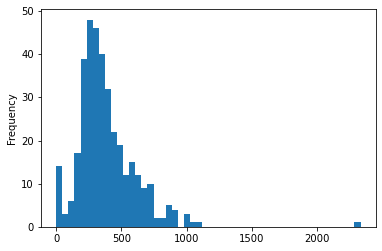

In [49]:
income['Total'].plot.hist(bins=50)

In [50]:
income['Total'].describe()

count     363.000000
mean      383.123967
std       226.645313
min         0.000000
25%       244.500000
50%       339.000000
75%       486.000000
max      2334.000000
Name: Total, dtype: float64

NameError: name 'StrMethodFormatter' is not defined

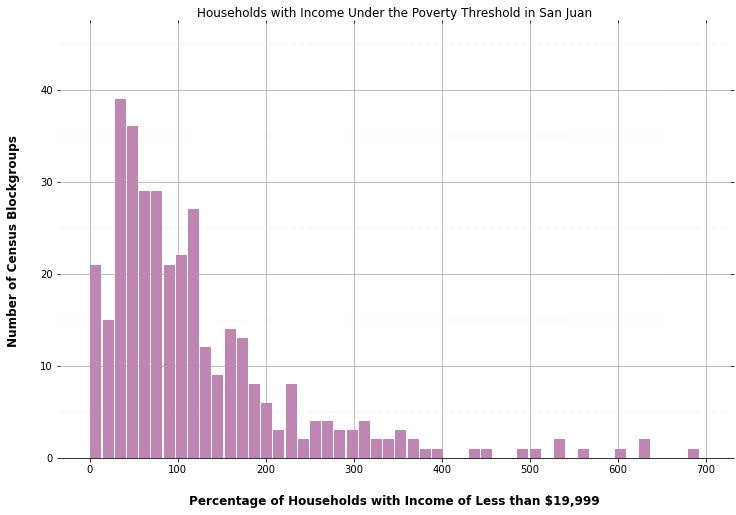

In [51]:
#I will be running now some histograms. 

ax = income.hist(column='Percent Households with Less than $19,999', bins=50, grid=True, figsize=(12,8), color='#bf86b4', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Households with Income Under the Poverty Threshold in San Juan")

    # Set x-axis label
    x.set_xlabel("Percentage of Households with Income of Less than $19,999", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Census Blockgroups", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

NameError: name 'StrMethodFormatter' is not defined

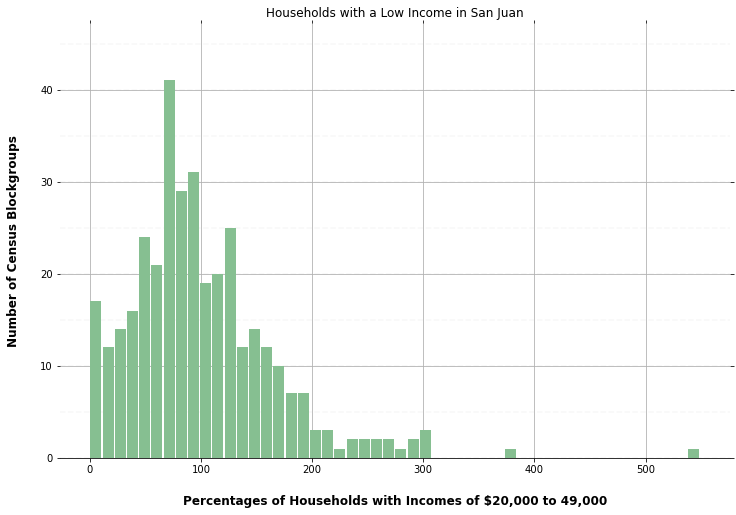

In [52]:
ax = income.hist(column='Percent Households with $20,000 to $49,999', bins=50, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Households with a Low Income in San Juan")

    # Set x-axis label
    x.set_xlabel("Percentages of Households with Incomes of $20,000 to 49,000", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Census Blockgroups", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

NameError: name 'StrMethodFormatter' is not defined

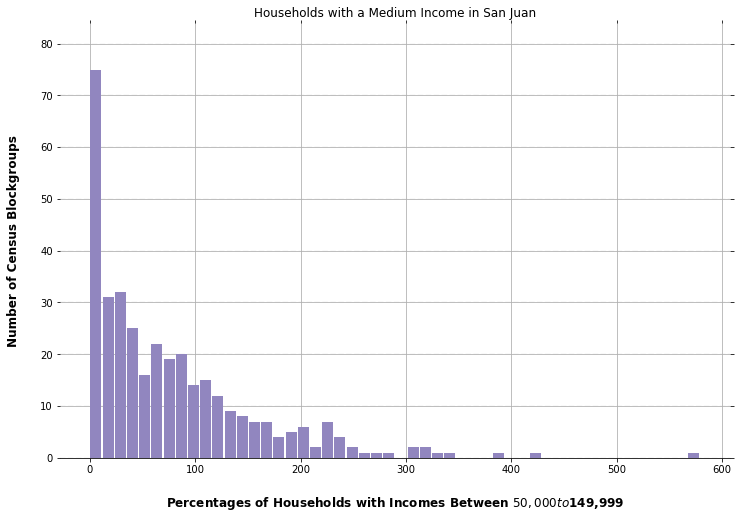

In [53]:
ax = income.hist(column='Percent Households with $50,000 to $149,999', bins=50, grid=True, figsize=(12,8), color='#9186bf', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Households with a Medium Income in San Juan")

    # Set x-axis label
    x.set_xlabel("Percentages of Households with Incomes Between $50,000 to $149,999", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Census Blockgroups", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

NameError: name 'StrMethodFormatter' is not defined

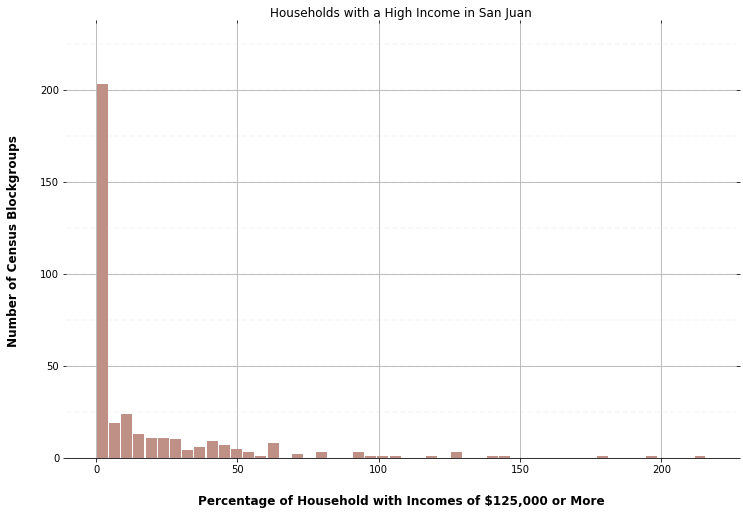

In [54]:
ax = income.hist(column='Percent Households with More than $125,000', bins=50, grid=True, figsize=(12,8), color='#bf9186', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Households with a High Income in San Juan")

    # Set x-axis label
    x.set_xlabel("Percentage of Household with Incomes of $125,000 or More", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Census Blockgroups", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

These histograms let me see the distribution of the data.

Now, I will be creating some maps to better visualize this. 

In [57]:
#let me do web_mercator again since a lot has changed. 
income_web_mercator = income.to_crs(epsg=3857)

Text(0.5, 1.0, 'Households Living with High Income')

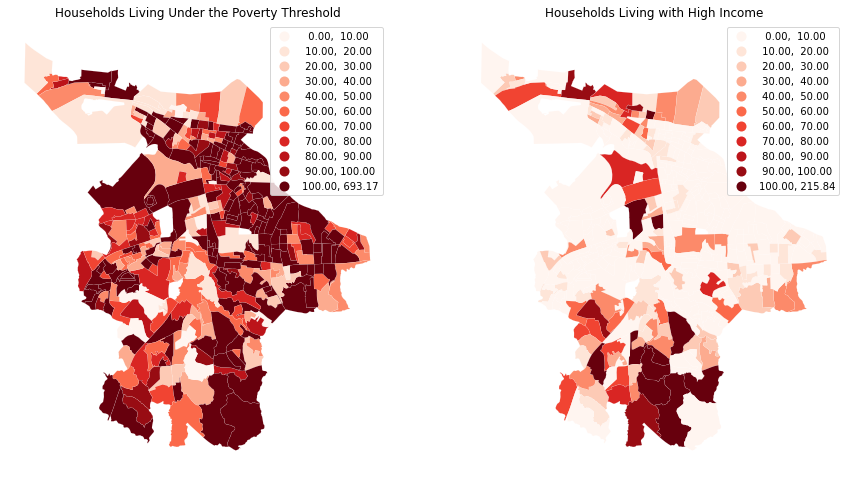

In [58]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# percent households with Less than $19,000 on the left
income_web_mercator.plot(column='Percent Households with Less than $19,999', 
            cmap='Reds', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Households Living Under the Poverty Threshold")

#  Percent Households with more than $125,000 map on the right
income_web_mercator.plot(column='Percent Households with More than $125,000', 
            cmap='Reds', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Households Living with High Income")

Text(0.5, 1.0, 'Percentage of Households Living with Medium Income')

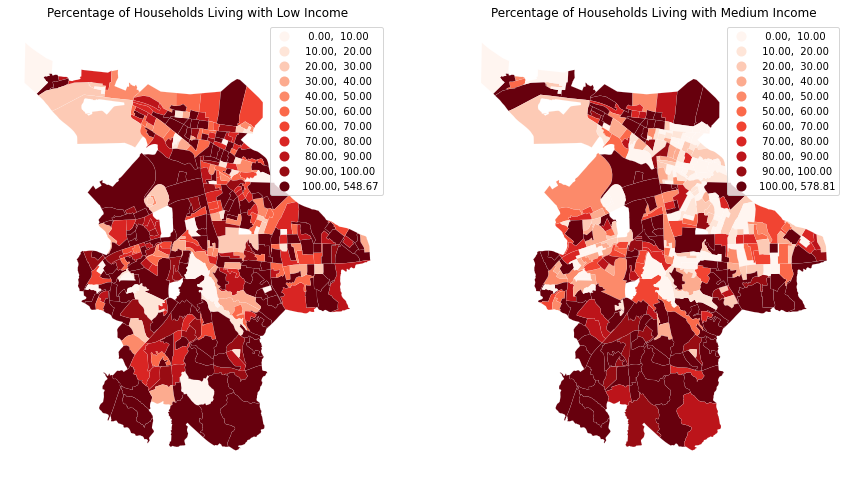

In [59]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs


income_web_mercator.plot(column='Percent Households with $20,000 to $49,999', 
            cmap='Reds', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of Households Living with Low Income")


income_web_mercator.plot(column='Percent Households with $50,000 to $149,999', 
            cmap='Reds', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of Households Living with Medium Income")

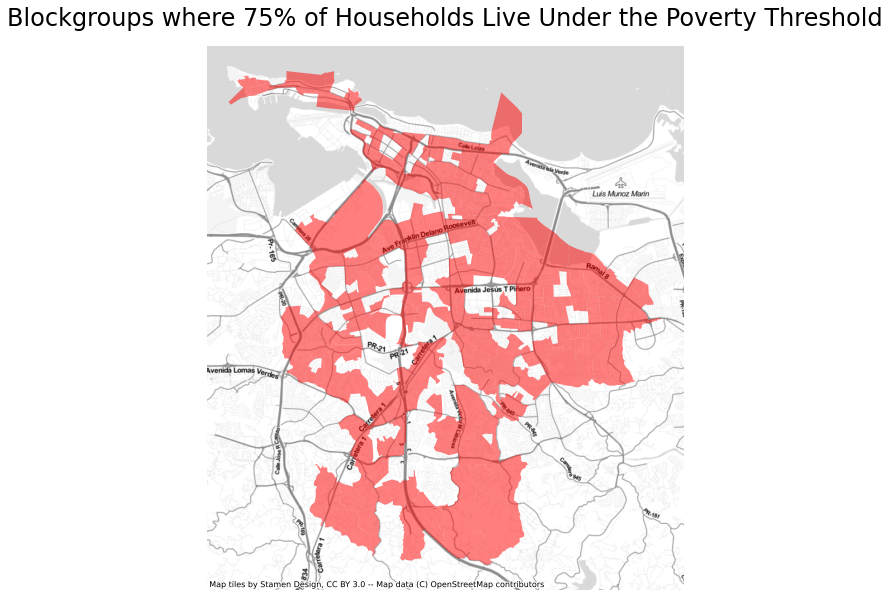

In [60]:
#Now I am going to add some basemaps

fig, ax = plt.subplots(figsize=(10, 10))

# add the layer with ax=ax in the argument 
income_web_mercator[income_web_mercator['Households with Less than $19,999'] > 75].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Blockgroups where 75% of Households Live Under the Poverty Threshold',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

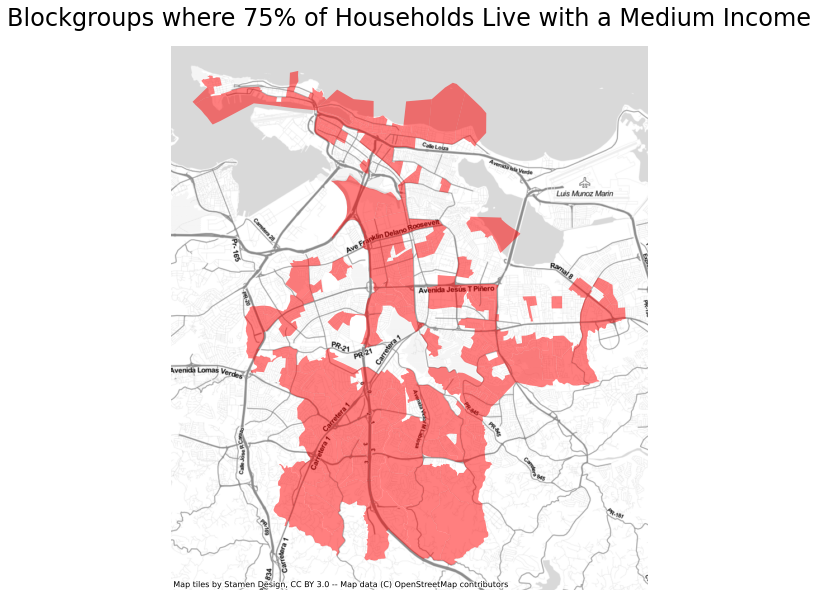

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

# add the layer with ax=ax in the argument 
income_web_mercator[income_web_mercator['Households with $50,000 to $149,999'] > 75].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Blockgroups where 75% of Households Live with a Medium Income',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

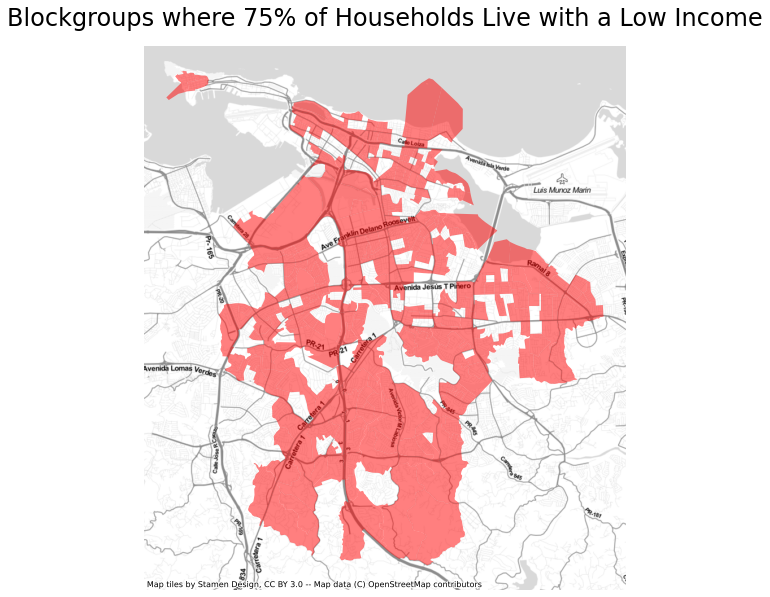

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))

# add the layer with ax=ax in the argument 
income_web_mercator[income_web_mercator['Households with $20,000 to $49,999'] > 75].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Blockgroups where 75% of Households Live with a Low Income',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

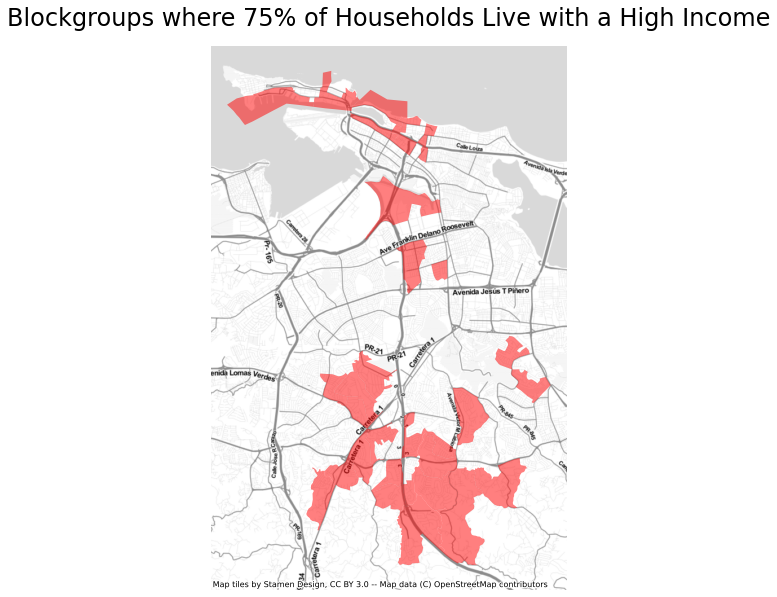

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

# add the layer with ax=ax in the argument 
income_web_mercator[income_web_mercator['Households with More than $125,000'] > 75].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Blockgroups where 75% of Households Live with a High Income',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

#### Race Variable

In [64]:
#importing my data
race=gpd.read_file('acs2019_san juan_race.geojson')

In [65]:
race.head()

geoid                         name  B03002001  \
0  15000US721270004001  Block Group 1, San Juan, PR      902.0   
1  15000US721270004002  Block Group 2, San Juan, PR      647.0   
2  15000US721270005061  Block Group 1, San Juan, PR      589.0   
3  15000US721270005062  Block Group 2, San Juan, PR      926.0   
4  15000US721270006001  Block Group 1, San Juan, PR      630.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0             256.0        0.0              14.0        0.0              14.0   
1             178.0       66.0              63.0       22.0              24.0   
2             156.0      104.0              72.0      104.0              72.0   
3             243.0       61.0              81.0       61.0              81.0   
4             173.0        0.0              14.0        0.0              14.0   

   B03002004  B03002004, Error  ...  B03002017, Error  B03002018  \
0        0.0              14.0  ...              14.0      140.0   
1       37.0              58.0  ...              14.0        6.0   
2        0.0              14.0  ...              14.0       34.0   
3        0.0              14.0  ...              14.0       31.0   
4        0.0              14.0  ...              14.0       59.0   

   B03002018, Error  B03002019  B03002019, Error  B03002020  B03002020, Error  \
0              78.0      106.0              98.0        0.0              14.0   
1              10.0       55.0              75.0        0.0              14.0   
2              37.0       40.0              39.0       10.0              14.0   
3              34.0      147.0             147.0       11.0              16.0   
4              86.0       84.0              74.0        0.0              14.0   

   B03002021  B03002021, Error  \
0      106.0              98.0   
1       55.0              75.0   
2       30.0              39.0   
3      136.0             147.0   
4       84.0              74.0   

                                            geometry  
0  MULTIPOLYGON (((-66.11862 18.46914, -66.11834 ...  
1  MULTIPOLYGON (((-66.11601 18.46817, -66.11569 ...  
2  MULTIPOLYGON (((-66.11925 18.46353, -66.11908 ...  
3  MULTIPOLYGON (((-66.12455 18.46155, -66.12021 ...  
4  MULTIPOLYGON (((-66.10417 18.46589, -66.10386 ...  

[5 rows x 45 columns]

In [66]:
# drop the row with index 0 (i.e. the first row)
race = race.drop([0])

In [67]:
#now I am going to get rid of error columns
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [68]:
# redefine gdf with only columns to keep
race = race[columns_to_keep]

In [69]:
#now, I am renaming the columns using the data dictionary
race.columns = ['geoid',
'name',
'Total',
'Not Hispanic or Latino',
'White alone',
'Black or African American alone',
'American Indian and Alaska Native alone',
'Asian alone',
'Native Hawaiian and Other Pacific Islander alone',
'Some other race alone',
'Two or more races',
'Two races including Some other race',
'Two races excluding Some other race, and three or more races',
'Hispanic or Latino',
'White alone',
'Black or African American alone',
'American Indian and Alaska Native alone',
'Asian alone',
'Native Hawaiian and Other Pacific Islander alone',
'Some other race alone',
'Two or more races',
'Two races including Some other race',
'Two races excluding Some other race, and three or more races',
'geometry']

In [70]:
race_sorted = race.sort_values(by='Total',ascending = False)

In [71]:
race_sorted[['geoid','Total']].head(10)

geoid     Total
364       16000US7276770  323279.0
199  15000US721270068001    4015.0
345  15000US721270100421    2983.0
340  15000US721270100222    2545.0
292  15000US721270091224    2434.0
349  15000US721270102001    2425.0
316  15000US721270098005    2419.0
346  15000US721270100422    2373.0
158  15000US721270054033    2330.0
239  15000US721270080023    2329.0

In [72]:
#same issue of 364 than on the other dataset. Let's get rid of it. 
race = race.drop([364])

In [73]:
#i am going to normalize the data now
list(race)

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'Hispanic or Latino',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'geometry']

In [74]:
race['Percent Not Hispanic'] = race['Not Hispanic or Latino']/race['Total']*100
race['Percent Hispanic'] = race['Hispanic or Latino']/race['Total']*100

In [75]:
race.head()

geoid                         name  Total  \
1  15000US721270004002  Block Group 2, San Juan, PR  647.0   
2  15000US721270005061  Block Group 1, San Juan, PR  589.0   
3  15000US721270005062  Block Group 2, San Juan, PR  926.0   
4  15000US721270006001  Block Group 1, San Juan, PR  630.0   
5  15000US721270006002  Block Group 2, San Juan, PR  647.0   

   Not Hispanic or Latino  White alone  Black or African American alone  \
1                    66.0         22.0                             37.0   
2                   104.0        104.0                              0.0   
3                    61.0         61.0                              0.0   
4                     0.0          0.0                              0.0   
5                    52.0         39.0                             13.0   

   American Indian and Alaska Native alone  Asian alone  \
1                                      0.0          0.0   
2                                      0.0          0.0   
3                                      0.0          0.0   
4                                      0.0          0.0   
5                                      0.0          0.0   

   Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
1                                               0.0                    0.0   
2                                               0.0                    0.0   
3                                               0.0                    0.0   
4                                               0.0                    0.0   
5                                               0.0                    0.0   

   ...  American Indian and Alaska Native alone  Asian alone  \
1  ...                                      0.0          0.0   
2  ...                                      0.0          0.0   
3  ...                                      0.0          0.0   
4  ...                                      0.0          0.0   
5  ...                                      0.0          0.0   

   Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
1                                               0.0                    6.0   
2                                               0.0                   34.0   
3                                               0.0                   31.0   
4                                               0.0                   59.0   
5                                               0.0                   25.0   

   Two or more races  Two races including Some other race  \
1               55.0                                  0.0   
2               40.0                                 10.0   
3              147.0                                 11.0   
4               84.0                                  0.0   
5               89.0                                  0.0   

   Two races excluding Some other race, and three or more races  \
1                                               55.0              
2                                               30.0              
3                                              136.0              
4                                               84.0              
5                                               89.0              

                                            geometry  Percent Not Hispanic  \
1  MULTIPOLYGON (((-66.11601 18.46817, -66.11569 ...             10.200927   
2  MULTIPOLYGON (((-66.11925 18.46353, -66.11908 ...             17.657046   
3  MULTIPOLYGON (((-66.12455 18.46155, -66.12021 ...              6.587473   
4  MULTIPOLYGON (((-66.10417 18.46589, -66.10386 ...              0.000000   
5  MULTIPOLYGON (((-66.12381 18.46080, -66.12087 ...              8.037094   

   Percent Hispanic  
1         89.799073  
2         82.342954  
3         93.412527  
4        100.000000  
5         91.962906  

[5 rows x 26 columns]

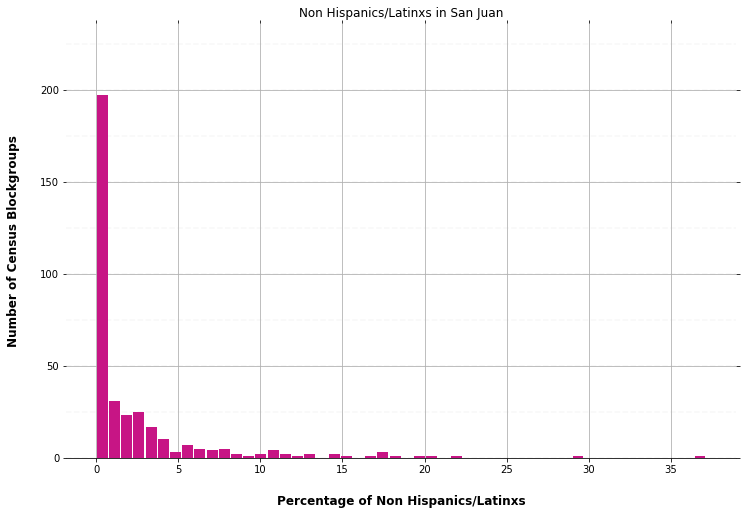

In [76]:
ax = race.hist(column='Percent Not Hispanic', bins=50, grid=True, figsize=(12,8), color='#c71585', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Non Hispanics/Latinxs in San Juan")

    # Set x-axis label
    x.set_xlabel("Percentage of Non Hispanics/Latinxs", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Census Blockgroups", labelpad=20, weight='bold', size=12)



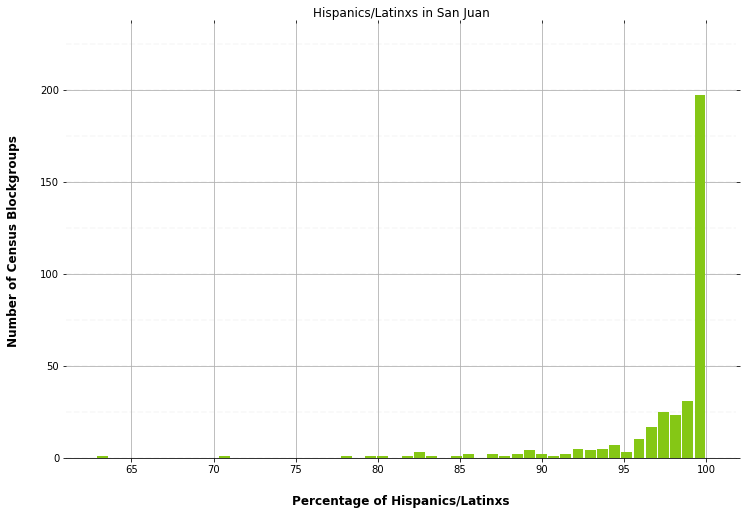

In [77]:
ax = race.hist(column='Percent Hispanic', bins=50, grid=True, figsize=(12,8), color='#85c715', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Hispanics/Latinxs in San Juan")

    # Set x-axis label
    x.set_xlabel("Percentage of Hispanics/Latinxs", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Census Blockgroups", labelpad=20, weight='bold', size=12)

    # Format y-axis label

In [78]:
race_web_mercator = race.to_crs(epsg=3857)

In [79]:
list(race_web_mercator)

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'Hispanic or Latino',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'geometry',
 'Percent Not Hispanic',
 'Percent Hispanic']

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

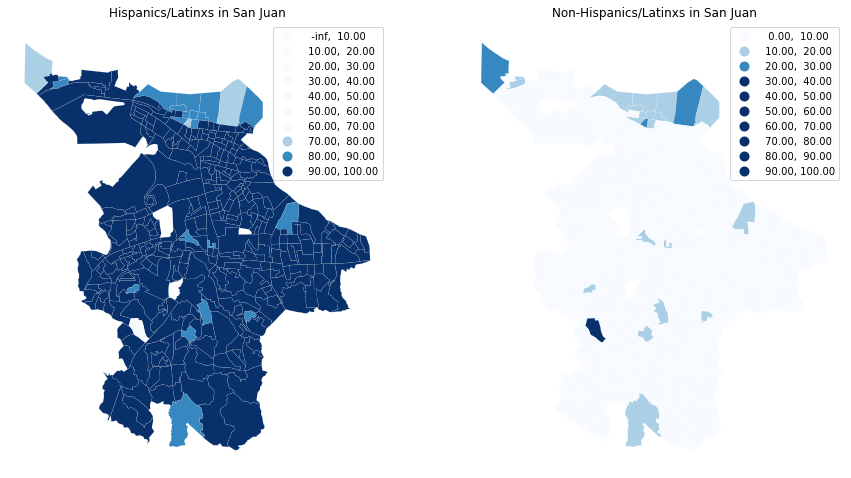

In [80]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# percent hispanics
race_web_mercator.plot(column='Percent Hispanic', 
            cmap='Blues', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Hispanics/Latinxs in San Juan")

#  Percent not hispanics
race_web_mercator.plot(column='Percent Not Hispanic', 
            cmap='Blues', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Non-Hispanics/Latinxs in San Juan")
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [81]:
#now I will give it a basemap
race_web_mercator= race.to_crs(epsg=3857)

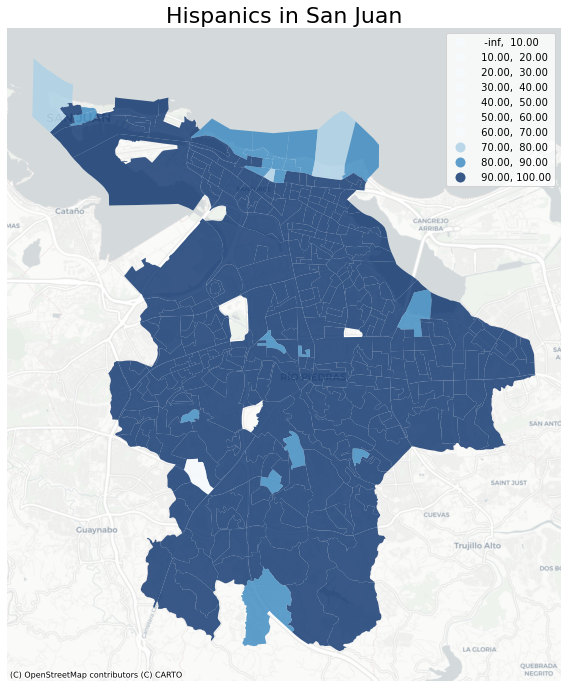

In [82]:
fig,ax = plt.subplots(figsize=(12,12))

race_web_mercator.plot(ax=ax,
        column='Percent Hispanic',
        legend=True,
        alpha=0.8,
        cmap='Blues',
        scheme='user_defined',
        classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]})

ax.axis('off')
ax.set_title('Hispanics in San Juan',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

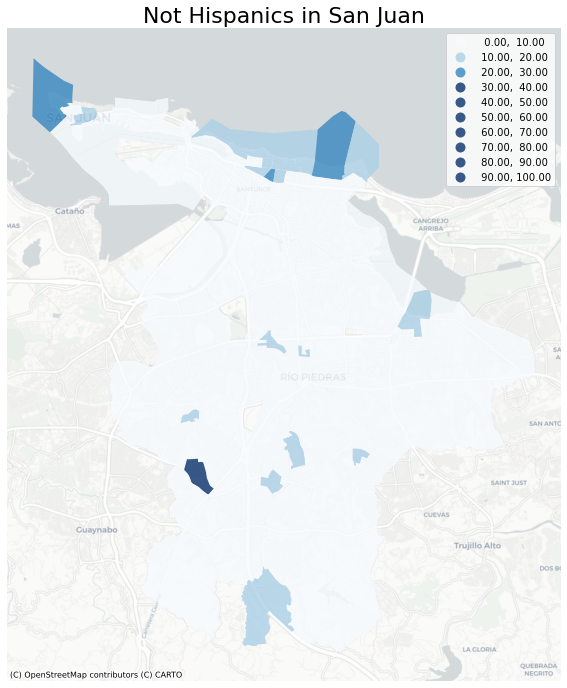

In [83]:
fig,ax = plt.subplots(figsize=(12,12))

race_web_mercator.plot(ax=ax,
        column='Percent Not Hispanic',
        legend=True,
        alpha=0.8,
        cmap='Blues',
        scheme='user_defined',
                      classification_kwds={'bins':[10,20,30,40,50,60,70,80,90,100]})

ax.axis('off')
ax.set_title('Not Hispanics in San Juan',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

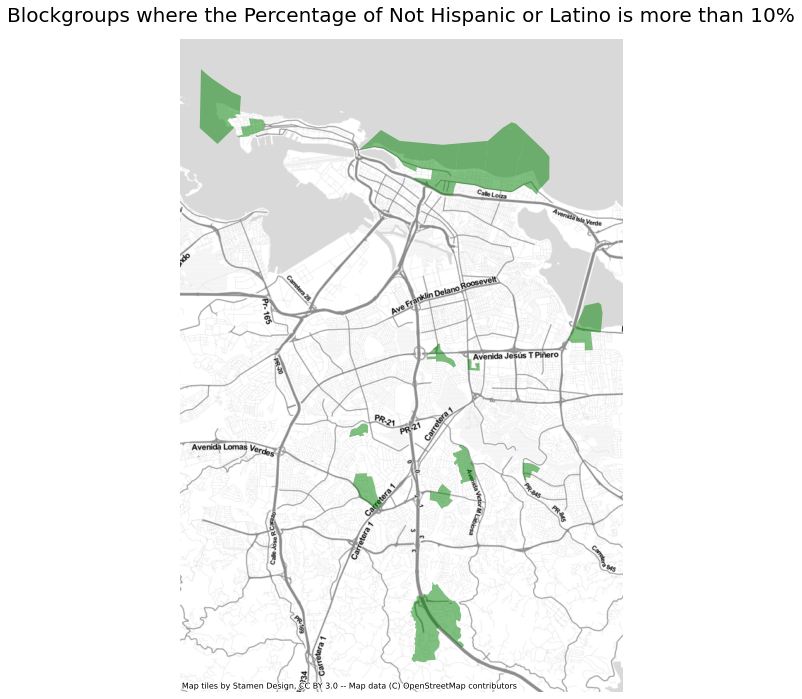

In [84]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Not Hispanic'] > 10].plot(
                                                               ax=ax, 
                                                               color="green",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Blockgroups where the Percentage of Not Hispanic or Latino is more than 10%',fontsize=20,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

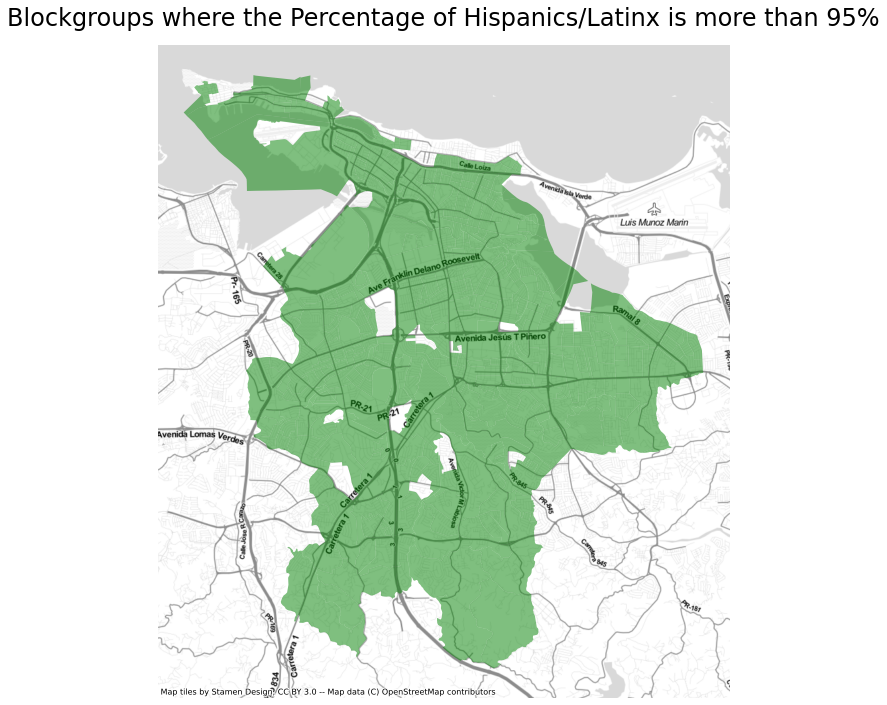

In [85]:
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
race_web_mercator[race_web_mercator['Percent Hispanic'] > 90].plot(
                                                               ax=ax, 
                                                               color="green",
                                                               alpha=0.5
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Blockgroups where the Percentage of Hispanics/Latinx is more than 95%',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)